# LSTM for Stock Analysis

In [4]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [5]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...,...
9681,2024-08-13,409.589996,414.950012,409.570007,414.010010,413.265137,19414300
9682,2024-08-14,414.799988,417.720001,412.450012,416.859985,416.109985,18267000
9683,2024-08-15,419.799988,421.109985,417.660004,421.029999,421.029999,20752100
9684,2024-08-16,420.600006,421.339996,417.299988,418.470001,418.470001,22757000


In [6]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9681,2024-08-13,414.010010
9682,2024-08-14,416.859985
9683,2024-08-15,421.029999
9684,2024-08-16,418.470001


In [7]:
import datetime

def str_to_datetime(s):
    split = str(s).split('-')
    print(split)
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

['1986', '03', '19']


datetime.datetime(1986, 3, 19, 0, 0)

In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']


['1986', '03', '13']
['1986', '03', '14']
['1986', '03', '17']
['1986', '03', '18']
['1986', '03', '19']
['1986', '03', '20']
['1986', '03', '21']
['1986', '03', '24']
['1986', '03', '25']
['1986', '03', '26']
['1986', '03', '27']
['1986', '03', '31']
['1986', '04', '01']
['1986', '04', '02']
['1986', '04', '03']
['1986', '04', '04']
['1986', '04', '07']
['1986', '04', '08']
['1986', '04', '09']
['1986', '04', '10']
['1986', '04', '11']
['1986', '04', '14']
['1986', '04', '15']
['1986', '04', '16']
['1986', '04', '17']
['1986', '04', '18']
['1986', '04', '21']
['1986', '04', '22']
['1986', '04', '23']
['1986', '04', '24']
['1986', '04', '25']
['1986', '04', '28']
['1986', '04', '29']
['1986', '04', '30']
['1986', '05', '01']
['1986', '05', '02']
['1986', '05', '05']
['1986', '05', '06']
['1986', '05', '07']
['1986', '05', '08']
['1986', '05', '09']
['1986', '05', '12']
['1986', '05', '13']
['1986', '05', '14']
['1986', '05', '15']
['1986', '05', '16']
['1986', '05', '19']
['1986', '05'

/var/folders/5p/z8xlp7rs73b2jjwlcvgrjwh40000gn/T/ipykernel_92464/1038773143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9681   2024-08-13
9682   2024-08-14
9683   2024-08-15
9684   2024-08-16
9685   2024-08-19
Name: Date, Length: 9686, dtype: datetime64[ns]

In [45]:
print(df.columns)
print(df.head())

df.index = df.pop('Date')
df

Index(['Close'], dtype='object')
               Close
Date                
1986-03-13  0.097222
1986-03-14  0.100694
1986-03-17  0.102431
1986-03-18  0.099826
1986-03-19  0.098090


KeyError: 'Date'

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [46]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                10)
windowed_df

['2021', '03', '25']
['2022', '03', '23']


,Target Date,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2021-03-25,237.130005,235.750000,234.809998,237.710007,237.039993,230.720001,230.350006,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,235.750000,234.809998,237.710007,237.039993,230.720001,230.350006,235.990005,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,234.809998,237.710007,237.039993,230.720001,230.350006,235.990005,237.580002,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,237.710007,237.039993,230.720001,230.350006,235.990005,237.580002,235.460007,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,237.039993,230.720001,230.350006,235.990005,237.580002,235.460007,232.339996,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022-03-17,295.920013,289.859985,278.910004,275.850006,288.500000,285.589996,280.070007,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,289.859985,278.910004,275.850006,288.500000,285.589996,280.070007,276.440002,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,278.910004,275.850006,288.500000,285.589996,280.070007,276.440002,287.149994,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,275.850006,288.500000,285.589996,280.070007,276.440002,287.149994,294.390015,295.220001,300.429993,299.160004,304.059998


In [47]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 10, 1), (252,))

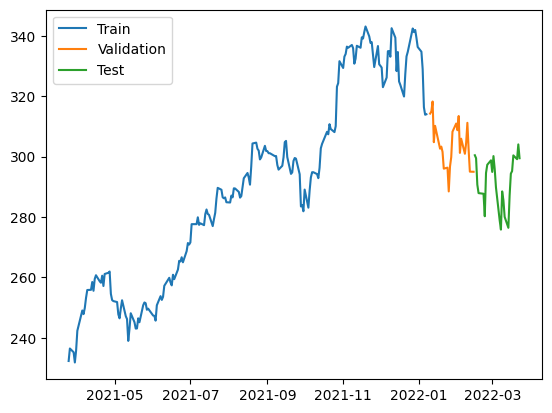

In [48]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((10, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(7)  # Predict 7 days ahead
])


model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 69ms/step - loss: 84704.8125 - mean_absolute_error: 289.3001 - val_loss: 92484.6016 - val_mean_absolute_error: 304.0256
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 84568.3984 - mean_absolute_error: 289.0640 - val_loss: 92265.0078 - val_mean_absolute_error: 303.6640
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 84310.8125 - mean_absolute_error: 288.6168 - val_loss: 91904.8281 - val_mean_absolute_error: 303.0696
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 83916.2422 - mean_absolute_error: 287.9320 - val_loss: 91399.3281 - val_mean_absolute_error: 302.2330
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 83368.0000 - mean_absolute_error: 286.9777 - val_loss: 90693.3828 - val_mean_absolute_error: 301.0597
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 82610.5703 - mean_absolute_error: 285.6518 - val_loss: 89747.14

Epoch 49/100
7/7 [==============================] - 0s 7ms/step - loss: 1013.6463 - mean_absolute_error: 26.9167 - val_loss: 294.9014 - val_mean_absolute_error: 15.5440
Epoch 50/100
7/7 [==============================] - 0s 7ms/step - loss: 1012.9630 - mean_absolute_error: 26.9066 - val_loss: 282.4770 - val_mean_absolute_error: 15.1732
Epoch 51/100
7/7 [==============================] - 0s 7ms/step - loss: 1012.0455 - mean_absolute_error: 26.8947 - val_loss: 289.0307 - val_mean_absolute_error: 15.3855
Epoch 52/100
7/7 [==============================] - 0s 7ms/step - loss: 1011.2265 - mean_absolute_error: 26.8800 - val_loss: 277.4546 - val_mean_absolute_error: 15.0297
Epoch 53/100
7/7 [==============================] - 0s 8ms/step - loss: 1011.2955 - mean_absolute_error: 26.8813 - val_loss: 269.6633 - val_mean_absolute_error: 14.7879
Epoch 54/100
7/7 [==============================] - 0s 7ms/step - loss: 1010.9120 - mean_absolute_error: 26.8726 - val_loss: 277.7100 - val_mean_absolute_e

7/7 [==============================] - 0s 7ms/step - loss: 1011.9285 - mean_absolute_error: 26.8956 - val_loss: 287.5992 - val_mean_absolute_error: 15.3501
Epoch 98/100
7/7 [==============================] - 0s 9ms/step - loss: 1009.8867 - mean_absolute_error: 26.8572 - val_loss: 266.7458 - val_mean_absolute_error: 14.7092
Epoch 99/100
7/7 [==============================] - 0s 8ms/step - loss: 1011.2797 - mean_absolute_error: 26.8761 - val_loss: 255.6561 - val_mean_absolute_error: 14.3556
Epoch 100/100
7/7 [==============================] - 0s 8ms/step - loss: 1010.0336 - mean_absolute_error: 26.8523 - val_loss: 277.4087 - val_mean_absolute_error: 15.0406


7/7 [==============================] - 0s 2ms/step


ValueError: x and y must have same first dimension, but have shapes (201,) and (1407,)

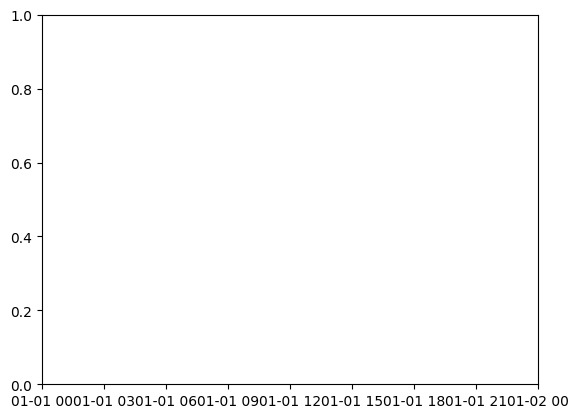

In [50]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

ValueError: x and y must have same first dimension, but have shapes (201,) and (1407,)

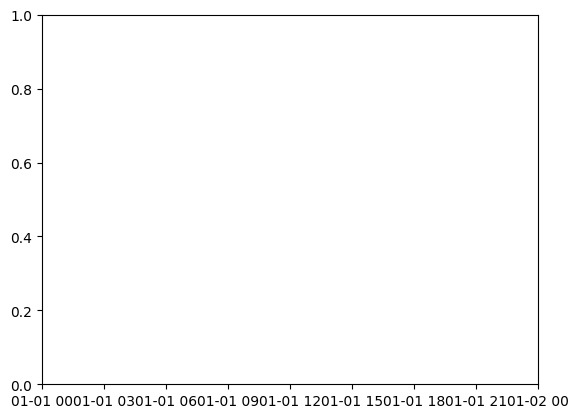

In [44]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])